## 用逻辑回归制作评分卡

在银行借贷场景中，评分卡是以分数形式来衡量一个客户信用风险大小的手段，它衡量想向别人借钱的人如果不能
如期履行合同中的还本付息责任，并让借钱给别人的人造成经济损失的可能性。一般来说，评分卡打出的分数越高，
客户的信用越好，风险越小。

借钱的实体可能是指个人，也可能是指公司和企业。对于企业来说，按照融资企业的融资用途分别使用企业融资模型、现金流融资模型、项目融资模型等模型。而对于个人来说，我们有四张卡来评估个人的信用程度：A卡、B卡、C卡、F卡。A卡被称为申请评分卡或者申请者评级模型，用来帮助金融机构来判断是否应该借钱给一个新用户。如果某一个人风险太高，我们就可以拒绝贷款。

## 1 导库，获取数据



In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(r"D:\DataSet\GiveMeSomeCredit\cs-training.csv",index_col=0)

In [3]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## 2 探索数据与数据预处理

In [4]:
data.shape

(150000, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

### 标签的含义
0     出现90天或更长时间的逾期行为   
1     贷款以及信用卡可用额度与总额度比例   
2     借款人借款年龄  
3     过去两年内出现35-59天逾期但是并没有更坏的次数  
4     每月偿还债务，赡养费，生活费用除以总收   
5     月收入  
6     开放式贷款和信贷数量  
7     过去两年内出现90天逾期或更坏的次数   
8     抵押贷款和房地产贷款数量，包括房屋净值信贷额度   
9     过去两年内出现60-89天逾期但是没有发展得更坏的次数  
10    家庭中不包括自身的家属人数（配偶、子女等）  

### 2.1 重复值的处理 

In [6]:
#检查数据是否存在重复值
data.duplicated().sum()

609

In [7]:
#去除重复值
data.drop_duplicates(inplace=True)

In [8]:
data.duplicated().sum()

0

In [9]:
#删除之后，需要重新恢复索引
data.index = range(data.shape[0])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

### 2.2 缺失值的处理

In [11]:
#检查缺失值的情况
data.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29221
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3828
dtype: int64

In [12]:
data.isnull().sum()/data.shape[0]

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

从上面可以看到，收入和家属人数这两个字段存在缺失值。

家属人数字段的缺失很少，可以考虑之间删除或者用均值来填补。

收入字段缺失了几乎20%，并且收入对于信用评分来讲是一个很重要的因素，这个特征必须要填补。  
对于银行数据，我们可以有这样的推断：高收入或者稳定收入对于申请贷款是很有帮助的。如果是一个收入稳定良好的人，肯定会倾向于写上自己的收入情况，那么这些收入字段缺失的人，更可能是收入状况不稳定或者收入比较低的人。所以，我们可以采用四分位数来填补缺失值，把所有收入字段为空的客户都当成低收入群体。当然，也有可能这些缺失是银行数据收集过程中的失误导致的。具体采用什么样的手段来填补缺失值，要和业务人员沟通，观察缺失值是如何产生的。在这里，我们采用随机森林来填补缺失值。

In [13]:
#使用均值填补家属人数
a = data['NumberOfDependents'].mean()
data['NumberOfDependents'].fillna(a,inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    149391 non-null  float64
dtype

In [15]:
#利用随机森林来填补收入字段
#这种做法，对于某一个特征大量缺失，但是其他特征却很完整的情况比较适用

def fill_missing_rf(X,y,to_fill):
    """
    X：要填补的特征矩阵
    y：完整的、没有缺失值的标签
    to_fill：要填补的那一列的名称
    """
    
    #构建新的特征矩阵和标签
    df = X.copy()
    fill = df.loc[:,to_fill]
    df = pd.concat([df.loc[:,df.columns != to_fill],pd.DataFrame(y)],axis=1)
    
    #找出训练集与测试集
    Ytrain = fill[fill.notnull()]
    Ytest = fill[fill.isnull()]
    Xtrain = df.iloc[Ytrain.index,:]
    Xtest = df.iloc[Ytest.index,:]
    
    #利用随机森林来填补缺失值
    from sklearn.ensemble import RandomForestRegressor as rfr
    rfr = rfr(n_estimators=100).fit(Xtrain,Ytrain)
    Ypredict = rfr.predict(Xtest)
    
    return Ypredict

In [16]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [17]:
X = data.iloc[:,1:]
y = data['SeriousDlqin2yrs']

In [18]:
y_pred = fill_missing_rf(X,y,'MonthlyIncome')

In [19]:
y_pred

array([0.18, 0.28, 0.1 , ..., 0.24, 0.11, 0.  ])

In [20]:
data.loc[data.loc[:,'MonthlyIncome'].isnull(),'MonthlyIncome']

6        NaN
8        NaN
16       NaN
32       NaN
41       NaN
          ..
149368   NaN
149369   NaN
149376   NaN
149384   NaN
149388   NaN
Name: MonthlyIncome, Length: 29221, dtype: float64

In [21]:
data.loc[data.loc[:,'MonthlyIncome'].isnull(),'MonthlyIncome'] = y_pred

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         149391 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    149391 non-null  float64
dtype

### 2.3 描述性统计处理异常值

现实数据中总是存在一些异常值，我们要把这些异常值捕捉出来，然后观察他们的性质。有时候，我们可能是要将这些异常值去除，而有些时候异常值则是我们的重点研究对象。

日常处理异常值，往往使用箱型图或者3sigma法则来寻找异常值。

具体到银行数据中，在特征量有限的情况下，我们往往使用描述性统计方法来观察数据的异常以及数据的分布情况。

In [23]:
#描述性统计
data.describe([0.01,0.1,0.25,.5,.75,.9,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,0.978007,1.093922,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,1275.000000,4985.100000,329664.0
MonthlyIncome,149391.0,5426.473075,13225.818231,0.0,0.0,0.180000,1800.000000,4427.000000,7416.000000,10800.000000,23250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


In [26]:
#可以观察到，年龄当中存在异常值。年龄的最小值居然是0，这不符合银行的业务需求，即便是儿童账户也要至少8岁
#我们可以查看一下年龄为0的人有多少
(data['age']==0).sum()

1

In [28]:
(data['age'] < 8).sum()

1

In [29]:
#最终发现只有一个人年龄为0，可以判断这是录入失误造成的，可以当成缺失值来处理，直接删掉这个样本
data = data[data['age'] != 0]

In [30]:
data[data.loc[:,'NumberOfTimes90DaysLate'] > 90]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1732,1,1.0,27,98,0.0,2700.000000,0,98,0,98,0.000000
2285,0,1.0,22,98,0.0,1392.094025,0,98,0,98,0.000000
3883,0,1.0,38,98,12.0,2646.420000,0,98,0,98,0.000000
4416,0,1.0,21,98,0.0,0.000000,0,98,0,98,0.000000
4704,0,1.0,21,98,0.0,2000.000000,0,98,0,98,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
146667,1,1.0,25,98,0.0,2150.920500,0,98,0,98,0.759863
147180,1,1.0,68,98,255.0,98.200000,0,98,0,98,0.000000
148548,1,1.0,24,98,54.0,616.500000,0,98,0,98,0.000000
148634,0,1.0,26,98,0.0,2000.000000,0,98,0,98,0.000000


In [32]:
data[data.loc[:,'NumberOfTimes90DaysLate'] > 90].count()

SeriousDlqin2yrs                        225
RevolvingUtilizationOfUnsecuredLines    225
age                                     225
NumberOfTime30-59DaysPastDueNotWorse    225
DebtRatio                               225
MonthlyIncome                           225
NumberOfOpenCreditLinesAndLoans         225
NumberOfTimes90DaysLate                 225
NumberRealEstateLoansOrLines            225
NumberOfTime60-89DaysPastDueNotWorse    225
NumberOfDependents                      225
dtype: int64

In [33]:
data.loc[:,'NumberOfTimes90DaysLate'].value_counts()

0     141107
1       5232
2       1555
3        667
4        291
98       220
5        131
6         80
7         38
8         21
9         19
10         8
11         5
96         5
13         4
12         2
14         2
15         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

In [34]:
#删除异常数据
data = data[data.loc[:,'NumberOfTimes90DaysLate']<90]

In [35]:
#恢复索引
data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149165 entries, 0 to 149164
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149165 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149165 non-null  float64
 2   age                                   149165 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149165 non-null  int64  
 4   DebtRatio                             149165 non-null  float64
 5   MonthlyIncome                         149165 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149165 non-null  int64  
 7   NumberOfTimes90DaysLate               149165 non-null  int64  
 8   NumberRealEstateLoansOrLines          149165 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149165 non-null  int64  
 10  NumberOfDependents                    149165 non-null  float64
dtype

### 2.4 样本不均衡问题

In [37]:
data['SeriousDlqin2yrs'].value_counts()

0    139292
1      9873
Name: SeriousDlqin2yrs, dtype: int64

In [41]:
X = data.iloc[:,1:]
y = data['SeriousDlqin2yrs']

In [43]:
import imblearn
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X,y = sm.fit_sample(X,y)

In [44]:
X.shape

(278584, 10)

In [45]:
y.value_counts()

1    139292
0    139292
Name: SeriousDlqin2yrs, dtype: int64

### 2.5 将数据集分为测试集与验证集

In [47]:
from sklearn.model_selection import train_test_split

X = pd.DataFrame(X)
y = pd.DataFrame(y)

X_train,X_vali,Y_train,Y_vali = train_test_split(X,y,test_size=0.3)


In [48]:
model_data = pd.concat([Y_train,X_train],axis=1)

In [49]:
model_data.index = range(model_data.shape[0])
model_data.columns = data.columns

In [50]:
vali_data = pd.concat([Y_vali,X_vali],axis=1)

In [51]:
vali_data.index = range(vali_data.shape[0])
vali_data.columns = data.columns

In [2]:
model_data.to_csv(r"D:\DataSet\GiveMeSomeCredit\model_data.csv")
vali_data.to_csv(r"D:\DataSet\GiveMeSomeCredit\vali_data.csv")

NameError: name 'model_data' is not defined

## 3 分箱

在评分卡制作过程中一个最重要的步骤就是分箱。分箱是评分卡最难也是最核心的思路。分箱的本质就是离散化连续变量，好让拥有不同属性的人被分成不同的类别。

1.要分成多少个箱子才合适？

首先，箱子的个数不能太多，最好控制在10个以下，4到5个为最佳。另外，离散化连续型变量必然伴随着信息的损失，并且箱子越少，损失的信息越多。为了衡量特征上的信息量以及特征对预测函数的贡献，银行业定义了一个概念叫做information value(IV):

$ \mathrm{IV}=\sum_{i=1}^{\mathrm{N}}(\operatorname{good} \%-\mathrm{bad} \%) * \mathrm{WOE}_{\mathrm{i}} $

N是这个特征中分箱的个数，i代表每个箱子，good%是这个箱子内的优质客户占整个特征中所有优质客户的比例。bad%是这个箱子里的坏客户占整个特征中所有坏客户的比例。

$\mathrm{WOE}_{\mathrm{i}}=\ln \left(\frac{\operatorname{good} \%}{\mathrm{bad} \%}\right)$

这是在银行业中用来衡量违约概率的指标。中文叫做证据权重，本质其实就是优质客户比上坏客户比例的对数。对于一个箱子来说，WOE越大就说明这个箱子里的优质客户越多。IV代表的意义如下表所示：

| IV     | 特征对预测函数的贡献   |
|------  |------|
| <0.03  | 特征几乎不带有效信息，对模型没有贡献，这种特征可以被删除|
| 0.03~0.09  | 有效信息很少，对模型的贡献度低|
| 0.1~0.29  | 有效信息一般，对模型的贡献度中等|
| 0.3~0.49  | 有效信息很多，对模型的贡献度较高|
| >=0.5  | 有效信息非常多，对模型贡献超高并且可疑|

我们会对特征进行分箱，然后计算每个箱子数目下的WOE值，利用IV值的曲线，找出合适的分箱个数。

2.分箱要达成什么样的效果？

希望不同属性的人有不同的分数，因此我们希望在同一个箱子内的人的属性是尽量相似的，而不同箱子的人的属性是尽量不同的。即组间差异大，组内差异小。对于评分卡来说，我们希望一个箱子内的人违约概率是类似的，而不同箱子的人违约概率差距很大，并且每个箱子中坏客户占的比重不同。我们可以使用卡方检验来对比两个箱子的相似性。如果两个箱子之间卡方检验的P值很大，则说明他们非常相似，那我们就可以将这两个箱子合并为1个箱子。

3.基于上述的思想，我们总结出对特征进行分箱的步骤：

第一，把连续型变量分成数量较多的分类型变量，比如，将几万个样本分成100组或50组。  
第二，确保每一组中都要包含两种类别的样本，否则IV值无法计算。   
第三，对相邻的组进行卡方检验，卡方检验的P值很大的组进行合并，直到数据的组数小于设定的N箱为止。   
第四，观察不同分箱个数下IV值的变化，找出最合适的分箱个数（在信息损失尽可能小的情况下，减少分箱的个数）。  



In [3]:
model_data = pd.read_csv(r"D:\DataSet\GiveMeSomeCredit\model_data.csv")
vali_data = pd.read_csv(r"D:\DataSet\GiveMeSomeCredit\vali_data.csv")

### 3.1 等频分箱
   
    pd.qcut是基于分位数的分箱函数，返回两个值：每个样本属于哪个箱子，以及所有箱子的上限和下限。
    参数q:要分箱的个数。
    参数retbins=True返回结构为索引的样本索引，即生成新的一列数据。

In [4]:
model_data['age']

0         59
1         42
2         62
3         39
4         57
          ..
195003    64
195004    52
195005    63
195006    58
195007    71
Name: age, Length: 195008, dtype: int64

In [5]:
model_data['qcut'], updown = pd.qcut(model_data['age'],retbins=True,q=20)  #retbins=True

In [6]:
model_data['qcut']

0         (58.0, 61.0]
1         (41.0, 43.0]
2         (61.0, 64.0]
3         (36.0, 39.0]
4         (56.0, 58.0]
              ...     
195003    (61.0, 64.0]
195004    (50.0, 52.0]
195005    (61.0, 64.0]
195006    (56.0, 58.0]
195007    (68.0, 74.0]
Name: qcut, Length: 195008, dtype: category
Categories (20, interval[float64]): [(20.999, 28.0] < (28.0, 31.0] < (31.0, 34.0] < (34.0, 36.0] ... (61.0, 64.0] < (64.0, 68.0] < (68.0, 74.0] < (74.0, 109.0]]

In [7]:
updown

array([ 21.,  28.,  31.,  34.,  36.,  39.,  41.,  43.,  45.,  47.,  48.,
        50.,  52.,  54.,  56.,  58.,  61.,  64.,  68.,  74., 109.])

In [8]:
model_data.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'qcut'],
      dtype='object')

In [9]:
#统计每个分箱中0,1的数量
#使用groupby
count_y0 = model_data[model_data['SeriousDlqin2yrs']==0].groupby(by='qcut').count()['SeriousDlqin2yrs']
count_y1 = model_data[model_data['SeriousDlqin2yrs']==1].groupby(by='qcut').count()['SeriousDlqin2yrs']

In [10]:
count_y0

qcut
(20.999, 28.0]    4210
(28.0, 31.0]      3555
(31.0, 34.0]      4050
(34.0, 36.0]      2874
(36.0, 39.0]      5133
(39.0, 41.0]      3887
(41.0, 43.0]      4000
(43.0, 45.0]      4413
(45.0, 47.0]      4774
(47.0, 48.0]      2488
(48.0, 50.0]      4932
(50.0, 52.0]      4733
(52.0, 54.0]      4677
(54.0, 56.0]      4570
(56.0, 58.0]      4525
(58.0, 61.0]      6641
(61.0, 64.0]      7022
(64.0, 68.0]      6639
(68.0, 74.0]      6732
(74.0, 109.0]     7746
Name: SeriousDlqin2yrs, dtype: int64

In [11]:
count_y1

qcut
(20.999, 28.0]    7490
(28.0, 31.0]      5944
(31.0, 34.0]      6797
(34.0, 36.0]      4629
(36.0, 39.0]      7613
(39.0, 41.0]      5777
(41.0, 43.0]      5689
(43.0, 45.0]      5947
(45.0, 47.0]      6424
(47.0, 48.0]      3101
(48.0, 50.0]      6068
(50.0, 52.0]      5787
(52.0, 54.0]      4999
(54.0, 56.0]      4109
(56.0, 58.0]      3512
(58.0, 61.0]      4794
(61.0, 64.0]      3183
(64.0, 68.0]      2325
(68.0, 74.0]      1886
(74.0, 109.0]     1333
Name: SeriousDlqin2yrs, dtype: int64

In [12]:
num_bins = [*zip(updown,updown[1:],count_y0,count_y1)]

In [13]:
num_bins

[(21.0, 28.0, 4210, 7490),
 (28.0, 31.0, 3555, 5944),
 (31.0, 34.0, 4050, 6797),
 (34.0, 36.0, 2874, 4629),
 (36.0, 39.0, 5133, 7613),
 (39.0, 41.0, 3887, 5777),
 (41.0, 43.0, 4000, 5689),
 (43.0, 45.0, 4413, 5947),
 (45.0, 47.0, 4774, 6424),
 (47.0, 48.0, 2488, 3101),
 (48.0, 50.0, 4932, 6068),
 (50.0, 52.0, 4733, 5787),
 (52.0, 54.0, 4677, 4999),
 (54.0, 56.0, 4570, 4109),
 (56.0, 58.0, 4525, 3512),
 (58.0, 61.0, 6641, 4794),
 (61.0, 64.0, 7022, 3183),
 (64.0, 68.0, 6639, 2325),
 (68.0, 74.0, 6732, 1886),
 (74.0, 109.0, 7746, 1333)]

In [14]:
columns = ['min','max','count_0','count_1']
df = pd.DataFrame(num_bins,columns=columns)

In [15]:
df.head()

,min,max,count_0,count_1
0,21.0,28.0,4210,7490
1,28.0,31.0,3555,5944
2,31.0,34.0,4050,6797
3,34.0,36.0,2874,4629
4,36.0,39.0,5133,7613


### 3.2 计算woe与IV值

In [16]:
df['total'] = df.count_0 + df.count_1   #一个箱中样本的总数量
df['percentage'] = df.total / df.total.sum()    #一个箱中的样本数占全部样本总数的比例
df['bad_rate'] = df.count_1 / df.total  
df['good%'] = df.count_0 / df.count_0.sum()
df['bad%'] = df.count_1 / df.count_1.sum()
df['woe'] = np.log(df['good%']/df['bad%'])

In [17]:
df.head()

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,28.0,4210,7490,11700,0.059998,0.640171,0.043135,0.076894,-0.578096
1,28.0,31.0,3555,5944,9499,0.048711,0.625750,0.036424,0.061022,-0.516017
2,31.0,34.0,4050,6797,10847,0.055623,0.626625,0.041495,0.069779,-0.519754
3,34.0,36.0,2874,4629,7503,0.038475,0.616953,0.029446,0.047522,-0.478626
4,36.0,39.0,5133,7613,12746,0.065361,0.597285,0.052592,0.078157,-0.396157


In [18]:
#计算IV值
rate = df['good%'] - df['bad%']
iv_age = np.sum(rate * df.woe)

In [19]:
iv_age

0.36067028982604155

In [20]:
#将计算WOE与IV值的过程写成函数，以便于更加方便的复用
def get_woe(num_bins):
    columns = ['min','max','count_0','count_1']
    df = pd.DataFrame(num_bins,columns=columns)
    
    df['total'] = df.count_0 + df.count_1   #一个箱中样本的总数量
    df['percentage'] = df.total / df.total.sum()    #一个箱中的样本数占全部样本总数的比例
    df['bad_rate'] = df.count_1 / df.total  
    df['good%'] = df.count_0 / df.count_0.sum()
    df['bad%'] = df.count_1 / df.count_1.sum()
    df['woe'] = np.log(df['good%']/df['bad%'])
    
    return df

def get_iv(df):
    rate = df['good%'] - df['bad%']
    iv = np.sum(rate * df.woe)
    return iv

### 3.3 卡方检验，合并箱体，画出IV曲线

In [50]:
import scipy
num_bins_ = num_bins.copy()
num_bins

[(21.0, 28.0, 4210, 7490),
 (28.0, 31.0, 3555, 5944),
 (31.0, 34.0, 4050, 6797),
 (34.0, 36.0, 2874, 4629),
 (36.0, 39.0, 5133, 7613),
 (39.0, 41.0, 3887, 5777),
 (41.0, 43.0, 4000, 5689),
 (43.0, 45.0, 4413, 5947),
 (45.0, 47.0, 4774, 6424),
 (47.0, 48.0, 2488, 3101),
 (48.0, 50.0, 4932, 6068),
 (50.0, 52.0, 4733, 5787),
 (52.0, 54.0, 4677, 4999),
 (54.0, 56.0, 4570, 4109),
 (56.0, 58.0, 4525, 3512),
 (58.0, 61.0, 6641, 4794),
 (61.0, 64.0, 7022, 3183),
 (64.0, 68.0, 6639, 2325),
 (68.0, 74.0, 6732, 1886),
 (74.0, 109.0, 7746, 1333)]

In [23]:
x1 = num_bins_[0][2:]
x2 = num_bins_[1][2:]

In [24]:
x1

(4210, 7490)

In [25]:
x2

(3555, 5944)

In [26]:
scipy.stats.chi2_contingency([x1,x2])

(4.635015966136715,
 0.03132585287178439,
 1,
 array([[4285.60309449, 7414.39690551],
        [3479.39690551, 6019.60309449]]))

In [27]:
#两组数之间的卡方值
scipy.stats.chi2_contingency([x1,x2])[0]

4.635015966136715

In [28]:
#p值
scipy.stats.chi2_contingency([x1,x2])[1]

#如果两个箱体之间的p值较大，说明两者相关性比较高可以进行合并。

0.03132585287178439

In [30]:
#如何得到所有相邻箱体两两之间的p值呢？
pvs = []
for i in range(len(num_bins_)-1):
    x1 = num_bins_[i][2:]
    x2 = num_bins_[i+1][2:]
    pv = scipy.stats.chi2_contingency([x1,x2])[1]
    pvs.append(pv)

In [31]:
pvs

[0.03132585287178439,
 0.9091184449521825,
 0.1890721846691577,
 0.005968274976904972,
 0.9506714114667775,
 0.13638317131088346,
 0.06180685244475525,
 0.9682919614586752,
 0.021186961664810936,
 0.7071351530875751,
 0.8309211355999704,
 2.0614475296600773e-06,
 5.570608415235401e-09,
 2.4328892610834894e-06,
 0.014306493703584796,
 6.692173619017405e-60,
 1.2054026739141181e-15,
 3.458128835846265e-10,
 2.7882711748298205e-35]

In [35]:
max(pvs)

0.9682919614586752

In [36]:
pvs.index(max(pvs))

7

In [37]:
num_bins_[7:9]

[(43.0, 45.0, 4413, 5947), (45.0, 47.0, 4774, 6424)]

In [38]:
#箱体合并
num_bins_[7:9] = [(
                  num_bins_[7][0],
                  num_bins_[8][1],
                  num_bins_[7][2]+num_bins_[8][2],
                  num_bins_[7][3]+num_bins_[8][3]
                                )]

In [39]:
#箱体合并之后的效果
num_bins_

[(21.0, 28.0, 4210, 7490),
 (28.0, 31.0, 3555, 5944),
 (31.0, 34.0, 4050, 6797),
 (34.0, 36.0, 2874, 4629),
 (36.0, 39.0, 5133, 7613),
 (39.0, 41.0, 3887, 5777),
 (41.0, 43.0, 4000, 5689),
 (43.0, 47.0, 9187, 12371),
 (47.0, 48.0, 2488, 3101),
 (48.0, 50.0, 4932, 6068),
 (50.0, 52.0, 4733, 5787),
 (52.0, 54.0, 4677, 4999),
 (54.0, 56.0, 4570, 4109),
 (56.0, 58.0, 4525, 3512),
 (58.0, 61.0, 6641, 4794),
 (61.0, 64.0, 7022, 3183),
 (64.0, 68.0, 6639, 2325),
 (68.0, 74.0, 6732, 1886),
 (74.0, 109.0, 7746, 1333)]

In [46]:
#总体实现
IV = []
axisx = []

while len(num_bins_) > 2:
    pvs = []
    #获得num_bins_两两之间的卡方值
    for i in range(len(num_bins_)-1):
        x1 = num_bins_[i][2:]
        x2 = num_bins_[i+1][2:]
        pv = scipy.stats.chi2_contingency([x1,x2])[1]
        pvs.append(pv)
    
    #合并p值最大的两组
    i = pvs.index(max(pvs))
    num_bins_[i:i+2] = [(
                  num_bins_[i][0],
                  num_bins_[i+1][1],
                  num_bins_[i][2]+num_bins_[i+1][2],
                  num_bins_[i][3]+num_bins_[i+1][3]
                                )]
    bins_df = get_woe(num_bins_)
    axisx.append(len(num_bins_))
    IV.append(get_iv(bins_df))



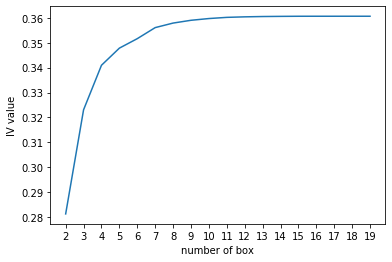

In [47]:
plt.figure()
plt.plot(axisx,IV)
plt.xticks(axisx)
plt.xlabel('number of box')
plt.ylabel('IV value')
plt.show()

通过图像可知，对于年龄这个特征来说，分箱的数目为6是最好的一个选择。

In [49]:
#自动分箱函数，将某个特征分为n箱

def get_bin(num_bins_,n):
    while len(num_bins_) > n:
        pvs = []
        #获得num_bins_两两之间的卡方值
        for i in range(len(num_bins_)-1):
            x1 = num_bins_[i][2:]
            x2 = num_bins_[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)

        #合并p值最大的两组
        i = pvs.index(max(pvs))
        num_bins_[i:i+2] = [(
                      num_bins_[i][0],
                      num_bins_[i+1][1],
                      num_bins_[i][2]+num_bins_[i+1][2],
                      num_bins_[i][3]+num_bins_[i+1][3]
                                    )]

    return num_bins_


In [51]:
afterbins = get_bin(num_bins_,6)
afterbins

[(21.0, 36.0, 14689, 24860),
 (36.0, 52.0, 34360, 46406),
 (52.0, 56.0, 9247, 9108),
 (56.0, 61.0, 11166, 8306),
 (61.0, 74.0, 20393, 7394),
 (74.0, 109.0, 7746, 1333)]

In [52]:
bins_df = get_woe(num_bins_)
bins_df

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,36.0,14689,24860,39549,0.202807,0.628587,0.150501,0.255218,-0.528151
1,36.0,52.0,34360,46406,80766,0.414168,0.574573,0.352046,0.476413,-0.302525
2,52.0,56.0,9247,9108,18355,0.094124,0.496214,0.094743,0.093505,0.013156
3,56.0,61.0,11166,8306,19472,0.099852,0.426561,0.114405,0.085271,0.293906
4,61.0,74.0,20393,7394,27787,0.142492,0.266096,0.208943,0.075908,1.012533
5,74.0,109.0,7746,1333,9079,0.046557,0.146822,0.079364,0.013685,1.757755
